In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [22]:
df = pd.read_csv('Customer Churn.csv')

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replace blank with 0 as tenure and no total charges are recorded
also total charges changes to float type

In [25]:
df["TotalCharges"]=df['TotalCharges'].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
df.duplicated().sum()

0

In [30]:
df['customerID'].duplicated().sum()

0

conerting data to true false:

In [31]:
def conv(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [32]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


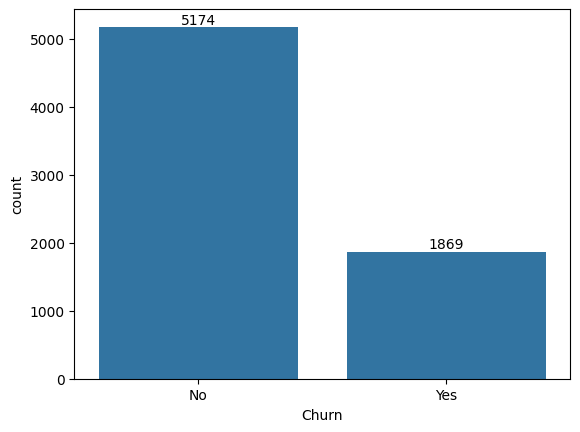

In [34]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.show()

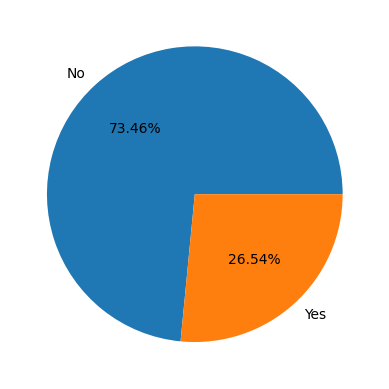

In [44]:
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.show()


from the pie chart 26.54% of customer are churn out

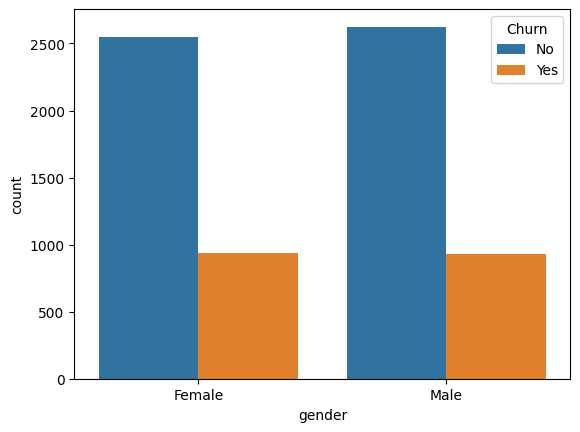

In [45]:
sns.countplot(x= 'gender',data = df , hue = 'Churn')
plt.show()

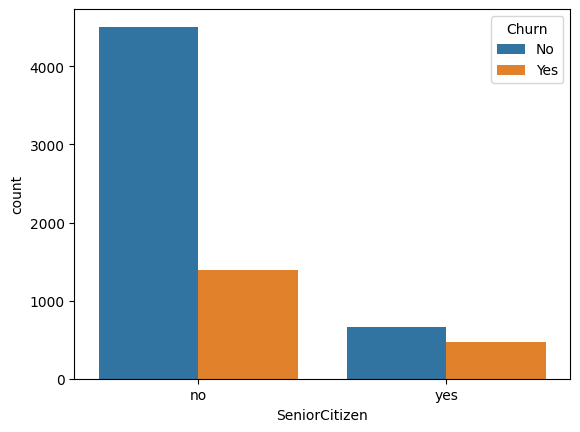

In [47]:
sns.countplot(x= 'SeniorCitizen',data = df , hue = 'Churn')
plt.show()

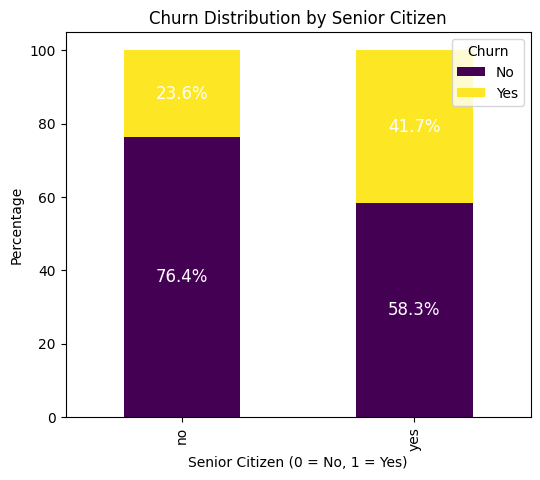

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentage
percentage = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
percentage.plot(kind='bar', stacked=True, ax=ax, colormap="viridis")

# Add percentage labels
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.1f%%', label_type='center', color='white', fontsize=12)

# Labels and title
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Senior Citizen')
plt.legend(title='Churn', loc='upper right')

plt.show()


#COMPARETIVE A GREAT PERCENTAGE OF PEOPLE IN SENIOR CITIZEN CATEGORY HAVE CHURNED

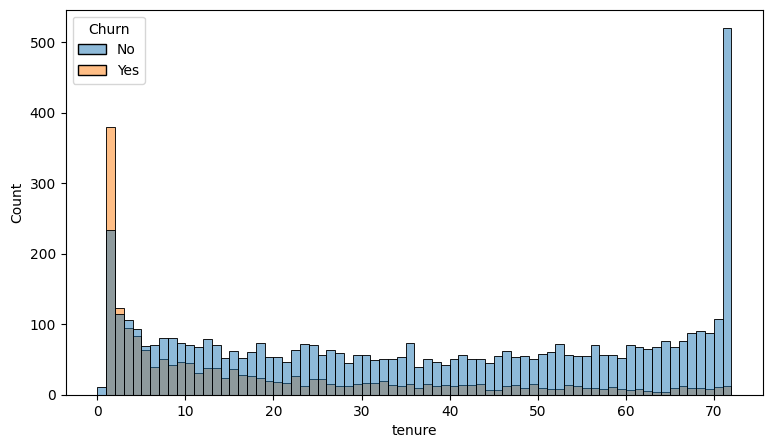

In [52]:
plt.figure(figsize=(9,5))
sns.histplot(x="tenure",data = df , bins = 72, hue = 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who used our services for 1 or 2 months have churned

Text(0.5, 1.0, 'count of custmor by contract ')

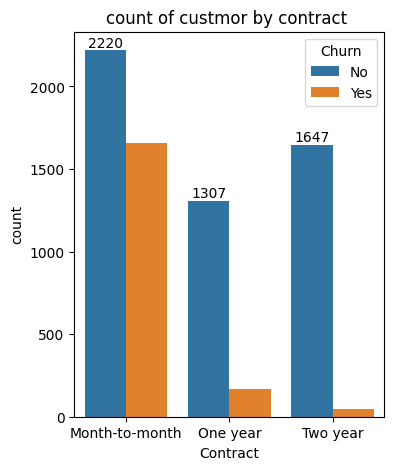

In [54]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x = "Contract", data= df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of custmor by contract ")

#pople who have month to month contract can likely to churn the service as compare to others who has longer contract then 1  month

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

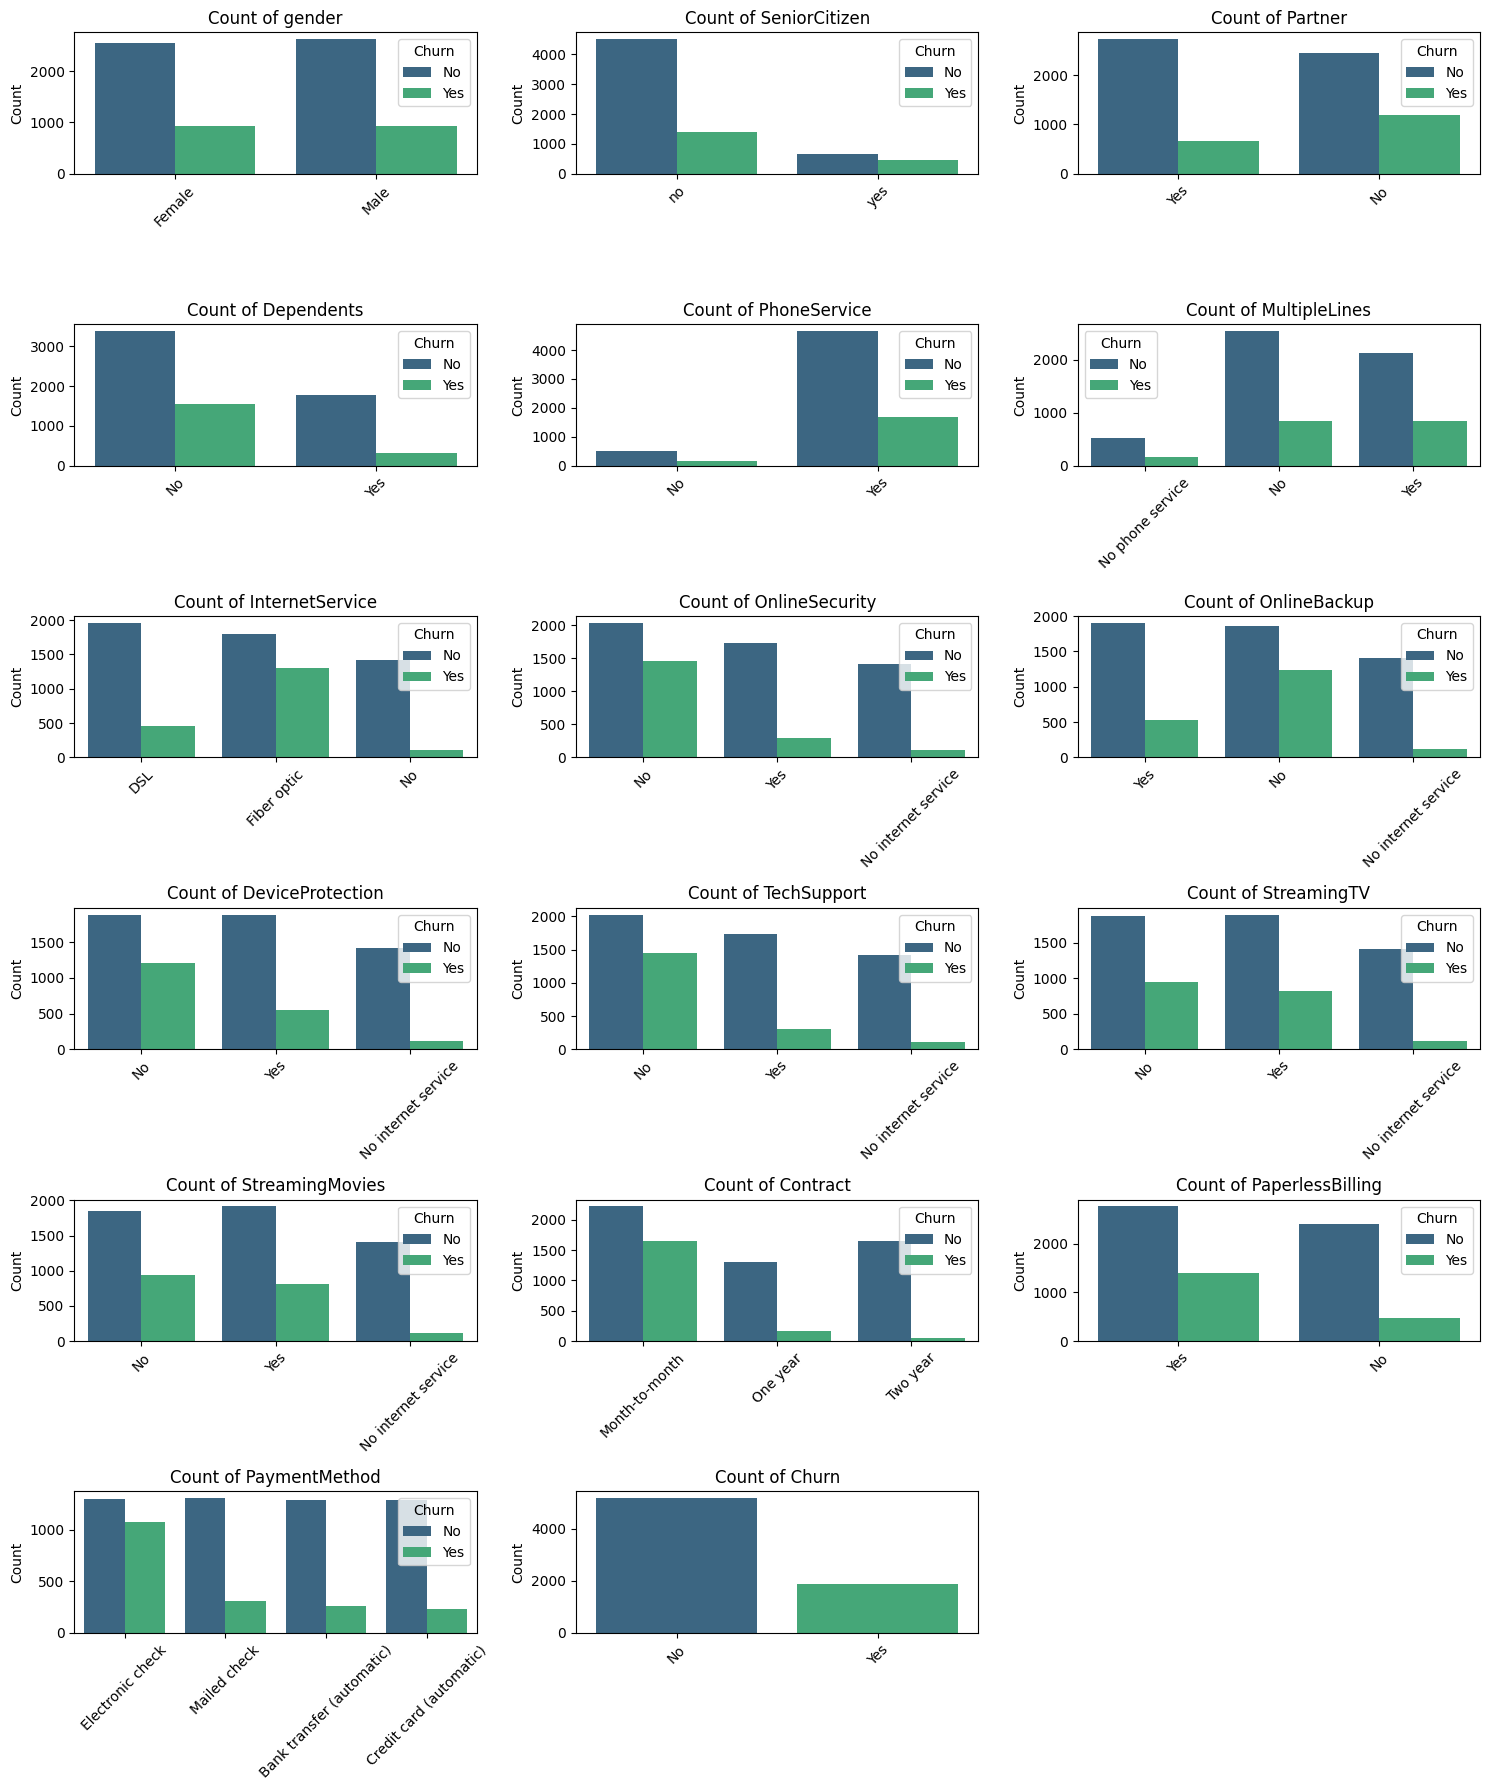

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify categorical columns (excluding numerical ones)
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

# Define number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Compute required rows

# Set figure size dynamically
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))  
axes = axes.flatten()  # Flatten axes array for easy indexing

# Create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis', hue = df['Churn'])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better fit
plt.show()


#The telecommunications dataset shows an equal gender distribution, 
#with fewer senior citizens. Most customers use phone and internet 
#services, with Fiber Optic Internet being popular but linked to higher churn. Month-to-month contracts a
#nd paperless billing are common, but they also correlate with incre
#ased churn. Many users do not subscribe to security or backup services, 
#and electronic check is a popular payment method. Overall, short-term con
#tract users and Fiber Optic subscribers are more likely to churn

Text(0.5, 1.0, 'chhurned Customer by payment method')

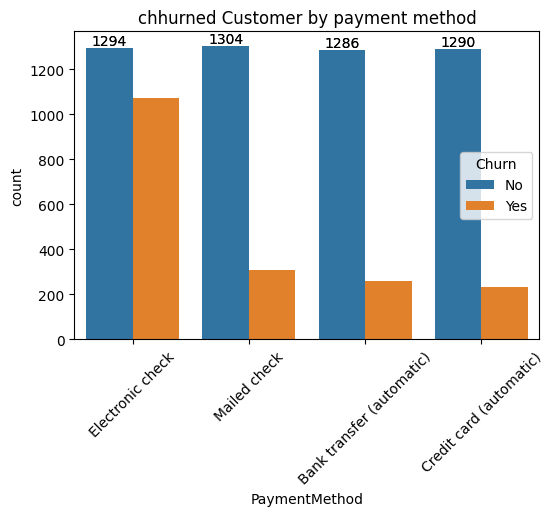

In [62]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title("chhurned Customer by payment method")

customer who are using electronic check are likely to churned